# SQL Analysis on How Weather Impacts Taxi Services



For this project, I began by retrieving data using HTML parsing and SQL parsing (see Part 1 PDF).  The data retrieved from this process is listed in the three dataframes listed below.

For this section of the project, I will be conducting an analysis of data related to Chicago taxi companies, their dropoff locations and whether or not weather impacts the use of said taxi services.

## Table of Contents  

I. Conducting a general overview of the information

II. Preparing data for analysis

III. Analysis of the data

IV. Hypothesis testing

V. Overall Conclusions

## Importing Data

In [ ]:
import pandas as pd
from scipy import stats as st
import numpy as np


november1516 = pd.read_csv('/datasets/project_sql_result_01.csv')
destination = pd.read_csv('/datasets/project_sql_result_04.csv')
saturday = pd.read_csv('/datasets/project_sql_result_07.csv')

In [ ]:
november1516.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
destination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
saturday.info()
print(saturday.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   start_ts            1068 non-null   object
 1   weather_conditions  1068 non-null   object
 2   duration_seconds    1068 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 25.2+ KB
           start_ts weather_conditions  duration_seconds
0  11/25/2017 16:00               Good              2410
1  11/25/2017 14:00               Good              1920
2  11/25/2017 12:00               Good              1543
3   11/4/2017 10:00               Good              2512
4   11/11/2017 7:00               Good              1440


In [ ]:
november1516.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [ ]:
destination.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466670


In [ ]:
saturday.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


### Conclusion  
* As all the data was retrieved through HTML and SQL parsing, none of the dataframes contained missing information.

* The number of taxi trips over the course of a two-day timespan (dataframe: november1516) varied greatly with the highest trip number being almost 20,000 trips by one taxi service and the lowest being 2 trips for another taxi service.    

* The number of trips that ended in particular locations also ranged greatly with one end location having an average of over 10000 drop-offs per day in November, while  the lowest number of drop-offs for a given location was 1.8 per day in November.

* Finally, the time length for trips taken on the various Saturdays of November 2017, also varied.  The longest trip was 7440 seconds or 2 hours and 4 minutes whereas the average trip length was 2071 seconds or 34 minutes.


## Data Preprocessing

In [ ]:


saturday['start_ts_datetime'] = pd.to_datetime(saturday['start_ts'], format= '%m/%d/%Y %H:%M')

## Conclusion

* There was very little work for me to do by means of data preprocessing.  There was no missing data, and everything was in order already as issues had been taken care of in the previous two sections (See Part 1 PDF).

* The only thing I ended up doing was converting the 'start_ts' column of the database, Saturday, to datetime.


## Exploratory data analysis

In [ ]:
top_ten = destination.head(10)

Text(0, 0.5, 'Average Trips')

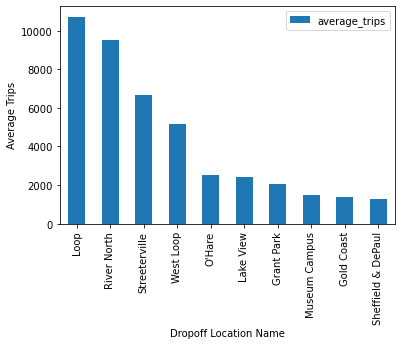

In [ ]:
top_ten.plot(x='dropoff_location_name', y='average_trips', kind='bar');
plt.xlabel('Dropoff Location Name')
plt.ylabel('Average Trips')

Text(0, 0.5, 'Trips Amount')

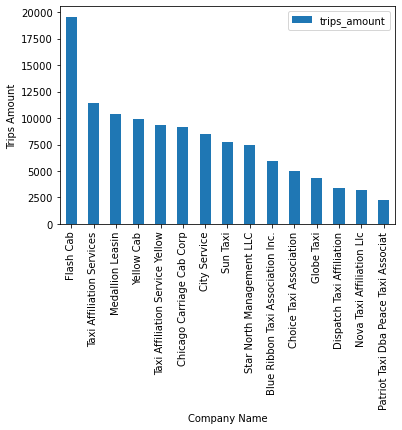

In [ ]:
taxi_top_fifteen = november1516.head(15)

taxi_top_fifteen.plot(x='company_name', y='trips_amount', kind='bar');
plt.xlabel('Company Name')
plt.ylabel('Trips Amount')

### Conclusion  
* To begin, the majority of the drop-off locations in Chicago were relegated to four particular areas: Loop, River North, Streeterville, and West Loop.  Technically, this makes sense as these four areas encompass the city's main community areas, business district and tourist sites.

* For the graph on taxi companies and the number of trips they conducted over a two-day period in Chicago, I opted to go with the top 15 companies and not the top 10 as I felt it showed the decline in services provided by the companies better.

* The bulk of the taxi rides were conducted by Flash Cab, i.e., over 19500 trips.

* The second highest number of trips were conducted by Taxi Affiliation Services, 11400+ -- a drop of almost half that of Flash Cab.  

* From this point onward, the decline continued to as little as 2000+ trips per day by Patriot Taxi Dba Peace Taxi Associat.






## Hypothesis Testing

In [ ]:
alpha = .05

results = st.ttest_ind(saturday[saturday.weather_conditions=='Good'].duration_seconds, saturday[saturday.weather_conditions=='Bad'].duration_seconds)

print('p-value: ', results.pvalue)

alpha = 0.05
if (results.pvalue < alpha):
        print("There is a difference in the average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays ")
else:
        print("There is not a difference in the  average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays")

p-value:  6.517970327099473e-12
There is a difference in the average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays 


In [ ]:
print(saturday[saturday.weather_conditions=='Good'].duration_seconds.mean())
print(saturday[saturday.weather_conditions=='Bad'].duration_seconds.mean())

1999.6756756756756
2427.2055555555557


### Conclusion  
Based upon the results of the hypothesis test, there is a significant difference in the duration of rides to the airport on bad days versus good days.  On bad days, movement is slowed significantly, probably due to rainy weather and traffic jams.

### Overall Conclusion  
* To begin, most of the drop-off locations in Chicago were relegated to four particular areas: Loop, River North, Streeterville, and West Loop. Technically, this makes sense as these four areas encompass the city's main community areas, business district and tourist sites.

* Moreover, the bulk of the taxi rides in Chicago were conducted by one cab company, Flash Cab, with over 19500 trips.

* The second highest number of trips were conducted by Taxi Affiliation Services, 11400+ -- a drop of almost half that of Flash Cab.

* From this point onward, the decline continued to as little as 2000+ trips per day by Patriot Taxi Dba Peace Taxi Associat.

* Finally, based upon the results of the hypothesis test, there is a significant difference in the duration of rides to the airport on bad days versus good days. On bad days, movement is slowed significantly, probably due to rainy weather and traffic jams.
